In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from collections import Counter, OrderedDict
print("done")

done


In [2]:
def clean_comment(comment): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", comment).split()) 
    
print("done")

done


In [3]:
data_file_new = pd.read_csv('/home/s2k_thegeek/SNA/facebook-news-master/fb_news_comments_1000K.csv', nrows=10000)

#names_new = pd.read_csv('/home/subhra_thegeek/SNA/facebook-news-master/fb_news_comments_1000K.csv', nrows=1)
#print (names_new)
#data_file_new.dropna(inplace = True)

data_file_new.head(10)
#print("done")
#type(data_file_new)

,created_time,from_id,from_name,message,post_id
0,2017-07-14T14:43:54+0000,228735667216,BBC News,We are speaking to NRA supporters as well as W...,228735667216_10154890879532217
1,2017-07-14T14:41:59+0000,228735667216,BBC News,If you are just joining us we are outside of t...,228735667216_10154890879532217
2,2017-07-14T14:41:58+0000,10155675667923755,Dave Meredith,Do you know how backward America are in allowi...,228735667216_10154890879532217
3,2017-07-14T14:42:25+0000,10159128799640694,Ruth Wilson,People who legally own guns often seem all too...,228735667216_10154890879532217
4,2017-07-14T14:40:46+0000,10207998650679157,Wanda Sisson Zwahr,Have you snowflakes watched the news and seen ...,228735667216_10154890879532217
5,2017-07-14T14:41:06+0000,1694899690817948,Dave Arnold,I don't understand why America wants to carry ...,228735667216_10154890879532217
6,2017-07-14T14:41:02+0000,1617298378314698,Theresa Stevens,It is my right to legally protect my life as b...,228735667216_10154890879532217
7,2017-07-14T14:34:05+0000,10155480484879344,Ryan Churchill,"I'm a gun owner, but the NRA are just terroris...",228735667216_10154890879532217
8,2017-07-14T14:42:47+0000,10155480484879344,Ryan Churchill,2nd amendment makes you think you are free fro...,228735667216_10154890879532217
9,2017-07-14T14:47:11+0000,1364364026946023,Billy Douglas,It should be a legal requirement that everyone...,228735667216_10154890879532217


In [4]:
to_drop = ['created_time','post_id']
data_file_new.drop(to_drop, inplace=True, axis=1)
data_file_new.sort_values('from_name', axis=0, inplace = True)
data_file_new = data_file_new.reset_index()
data_file_new = data_file_new.dropna()
data_file_new = data_file_new.set_index('from_name')
data_file_new.head(10)
#print("done")

,index,from_id,message
from_name,,,
'Audz Pretty,5899,10155473891197856,Looks like some of the people who commented he...
A Marie Houser,8657,433333993732827,Maybe instead of making an easy and insipid jo...
AJ Bullena,1699,239570526561594,True!
AJ Goodwin,779,10213281175445523,Elouise Goodwin what's the eggplant again?
AJ Goodwin,9418,10213281175445523,"Elouise Goodwin next article is, 12 dead 17 mi..."
AJ Santiago,1613,10214009049406797,Arman Sharif !!!!!!!!!
Aafreen Karim,1119,10210640460301753,Over the top !!! First time my relative went a...
Aaron Burdeau,7446,1779580728725326,Stephen I can always count on Aussies for havi...
Aaron Dixon,8961,1282580725202100,"I highly doubt the ""blue whale"" was the reason..."


In [5]:
#data_file_new

In [6]:
#data_file_new.index.unique().tolist()
#dict_comm = {'Name': 'Comment(s)'}
dict_comm = {}
for name in data_file_new.index.unique().tolist():
    if type(data_file_new.loc[name]['message'] ) == str:
        dict_comm.update({name:  data_file_new.loc[name]['message']})
    else:
        dict_comm.update({name: str(data_file_new.loc[name]['message'].tolist())})
        
#dict_comm
print("done")


done


In [7]:
def unique_in_list(list1):
    #myset = {}
    for i in range(len(list1)):
        if type(list1[i]) == list:
            list1[i] = list1[i][0]
        else:
            continue
    
    return list1

In [8]:
user_name = list(dict_comm.keys())
comments = list(dict_comm.values())
from_id = ['' for i in range(len(user_name))]

i = 0
count = 0
for name in user_name:
    
    if type(data_file_new.at[name,'from_id']) == str:
        from_id[i] = data_file_new.at[name,'from_id']
    else:
        from_id[i] = data_file_new.at[name,'from_id'].tolist()
    i = i + 1
    
from_id = unique_in_list(from_id)
print("done")

#comments
#from_id
#type(from_id[3])
#user_name
#str(data_file_new.at['A.s. Cend','from_id'])

done


In [9]:
stopwords = set(STOPWORDS)
stopwords.update(['the', 'maybe', 'has', 'so', 'xad'])
#stopwords = list(stopwords)
comment = []

for string in comments:
    word_list = string.split();
    strin = (' '.join([i for i in word_list if i not in stopwords]));
    comment.append(strin)

polarity = [ 0 for i in range(len(comments))]
polarity_index = [ '' for i in range(len(comments))]

subjectivity_index = [ 0 for i in range(len(comments))]

comment_words = ['' for i in range(len(comments))]


for i in range(len(comments)):
    st = ""
    store = str(comment[i])
    
    analysis = TextBlob(clean_comment(store))
    #comment_words[i] = analysis
    polarity[i] = analysis.sentiment.polarity
    subjectivity_index[i] = analysis.sentiment.subjectivity
    
    if analysis.sentiment.polarity > 0:
        st = "Positive"
    elif analysis.sentiment.polarity == 0:
        st = "Neutral"
    elif analysis.sentiment.polarity < 0:
        st = "Negative"
    polarity_index[i] = st
    
    tokens = analysis.split() 
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
          
    for words in tokens: 
        comment_words[i] = comment_words[i] + words + ' '
        
#polarity
#polarity_index
     

In [10]:
#comment_list = pd.Series.tolist(comments)
#user_name_list = pd.Series.tolist(user_name)
#from_id_list = pd.Series.tolist(from_id)
#list(stopwords)
len(comment)

8323

In [11]:
#data_file_new.loc['Dave Meredith']

In [12]:
#{name: data_file_new.loc[name]['message'].tolist()  for name in data_file_new['from_name'].unique()}

In [13]:
#{name: data_file_new.loc[name]['message'].tolist()  for name in data_file_new.index.values}


In [14]:
#data_file_new.loc['from_name']['message'].tolist()

In [15]:
#table_df = pd.DataFrame.from_dict(dict_comm, orient='index')
#table_df

In [16]:
#Counter(comment_words)
#comment_words

In [17]:
word_cloud = []
for sent_words in comment_words:
    words = re.findall(r'\w+', sent_words.lower())
    
    word_cloud.append(Counter(words).most_common(1))


#word_cloud


In [18]:
word_cloud_dict = {}
word_freq = []

for word in word_cloud:
    diti = dict(word)
    #print (diti)
    word_cloud_dict.update(diti)
    word_freq.append(diti.keys())
    
#word_freq

#dict(word_cloud[0]).values()

In [19]:
#len(word_cloud_dict)
#dict()

#my_dict = {item : a[index+1] for index, item in enumerate(a) if index % 2 == 0}

In [20]:
#dict_to_add = {dict_comm.keys():dict_comm.values()}#, 'Polarity': polarity_index, 'Most_Frequent_Word': words}
table_df = pd.DataFrame.from_dict(dict_comm, orient='index', columns=['Comments'])
table_df.index.names = ['Names']
table_df = table_df.assign(Most_Used_words=pd.Series(word_freq).values)
table_df = table_df.assign(ID=pd.Series(from_id).values)
table_df = table_df.assign(Polarity=pd.Series(polarity_index).values)
table_df = table_df.assign(Polarity_Value=pd.Series(polarity).values)
table_df = table_df.assign(Subjectivity=pd.Series(subjectivity_index).values)
table_df.head(10)

,Comments,Most_Used_words,ID,Polarity,Polarity_Value,Subjectivity
Names,,,,,,
'Audz Pretty,Looks like some of the people who commented he...,(someone),10155473891197856,Positive,0.200000,0.200000
A Marie Houser,Maybe instead of making an easy and insipid jo...,(maybe),433333993732827,Positive,0.466667,0.666667
AJ Bullena,True!,(true),239570526561594,Positive,0.437500,0.650000
AJ Goodwin,"[""Elouise Goodwin what's the eggplant again?"",...",(elouise),10213281175445523,Positive,0.026667,0.391667
AJ Santiago,Arman Sharif !!!!!!!!!,(arman),10214009049406797,Neutral,0.000000,0.000000
Aafreen Karim,Over the top !!! First time my relative went a...,(flowers),10210640460301753,Positive,0.086250,0.366667
Aaron Burdeau,Stephen I can always count on Aussies for havi...,(stephen),1779580728725326,Neutral,0.000000,0.000000
Aaron Dixon,"I highly doubt the ""blue whale"" was the reason...",(i),1282580725202100,Positive,0.062000,0.378000
Aaron Doull,Peter Craighead toes for thumbs or thumbs for ...,(toes),1582124208498621,Neutral,0.000000,0.000000


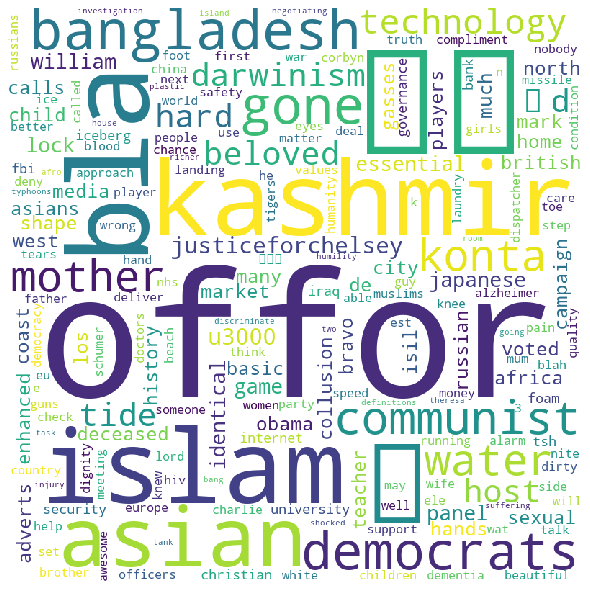

In [21]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate_from_frequencies(word_cloud_dict)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 




plt.show()

In [22]:
recomm_df = table_df.copy().loc[table_df['Subjectivity'] > 0]
recomm_df.shape

(6430, 6)

In [23]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
recomm_df['Comments'] = recomm_df['Comments'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(recomm_df['Comments'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6430, 18891)

In [24]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

mat = recomm_df['Subjectivity'].values.reshape(-1,1)
#mat

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(mat, mat)
#cosine_sim

In [25]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [26]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(recomm_df.index, index=recomm_df['Subjectivity']).drop_duplicates()
#indices = indices.set_index('Subjectivity')
#indices
#type(indices)

In [27]:
# Function that takes in person's name as input and outputs most similar movies
def get_recommendations(namesa, cosine_simi):
    # Get the index of the part that matches the title
    #idx = recomm_df.index[recomm_df[namesa]].tolist()
    idx = recomm_df.index.get_loc(namesa)

    # Get the pairwsie similarity scores of all person with that person
    sim_scores = list(enumerate(cosine_simi[idx]))
    
    # Sort the persons based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar persons
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    name_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar persons
    return name_indices#recomm_df['Subjectivity'].iloc[name_indices]

In [28]:
ind = get_recommendations('Joseph Quarshie', cosine_sim2)
#for i in ind:
    
#recomm_df.iloc[ind[0]]
recomm_df.iloc[ind]

,Comments,Most_Used_words,ID,Polarity,Polarity_Value,Subjectivity
Names,,,,,,
Joseph Quarshie,Wow,(wow),496811410656693,Positive,0.100000,1.000000
Nancy Hope,Wow!,(wow),10154683799876911,Positive,0.125000,1.000000
Nicodemus Singleton,Wow,(wow),147890149099545,Positive,0.100000,1.000000
Pradeep Somi GaneshBabu,Wow BBC News really? You made an article for t...,(wow),10155472399599054,Positive,0.150000,0.600000
Caroline Hannah,Wow amazing ❤️🙏 xx,(wow),10209742058204490,Positive,0.350000,0.950000
Rumi VP,Wow! Thats amazing!! <3,(wow),10213315513271789,Positive,0.616667,0.966667
Tim Wheeler,Wow! Must come and see! Dippy I hope be put so...,(wow),10213730466836781,Positive,0.487500,0.800000
James C. Dalman,"Wow, I hope everyone is alright. That came out...",(wow),10211900870709923,Positive,0.125000,1.000000
Musengo Lihonde,"['Can she play something please? 😊', 'Did you...",(can),1345902378861823,Positive,0.100000,0.600000


In [29]:
indi = get_recommendations('Joseph Quarshie', cosine_sim)
recomm_df.iloc[ind]

,Comments,Most_Used_words,ID,Polarity,Polarity_Value,Subjectivity
Names,,,,,,
Joseph Quarshie,Wow,(wow),496811410656693,Positive,0.100000,1.000000
Nancy Hope,Wow!,(wow),10154683799876911,Positive,0.125000,1.000000
Nicodemus Singleton,Wow,(wow),147890149099545,Positive,0.100000,1.000000
Pradeep Somi GaneshBabu,Wow BBC News really? You made an article for t...,(wow),10155472399599054,Positive,0.150000,0.600000
Caroline Hannah,Wow amazing ❤️🙏 xx,(wow),10209742058204490,Positive,0.350000,0.950000
Rumi VP,Wow! Thats amazing!! <3,(wow),10213315513271789,Positive,0.616667,0.966667
Tim Wheeler,Wow! Must come and see! Dippy I hope be put so...,(wow),10213730466836781,Positive,0.487500,0.800000
James C. Dalman,"Wow, I hope everyone is alright. That came out...",(wow),10211900870709923,Positive,0.125000,1.000000
Musengo Lihonde,"['Can she play something please? 😊', 'Did you...",(can),1345902378861823,Positive,0.100000,0.600000
